In [1]:
import sys

sys.path.insert(0, '../auxiliary_scripts/')

In [2]:
import numpy as np
import vtktools
import torch
import matplotlib.pyplot as plt 

In [3]:
#import AE_Models
from train_AE_functions import train_AE, evaluate

In [4]:
from graph_functions import get_node_features, get_complete_edge_list 

In [5]:
from graph_functions import create_graph_data_list_mnist
from plot_results_mnist import evaluate_and_plot_mnist , compare_plots_models_mnist 

In [6]:
from graph_functions import create_graph_data_list_vtu_file
from plot_results_vtu import plot_model_2d_vtu, compare_plots_models_2d_vtu 

In [7]:
from rank_models import plot_losses , rank_losses

# Understanding MNIST

In [8]:
graph_data_list_mnist , n_points = create_graph_data_list_mnist(num_samples_to_use=1000, mnist_path="../../Datasets/")

In [9]:
mnist_min = [ graph_data_list_mnist[i].x.numpy().min() for i in range(len(graph_data_list_mnist)) ]
mnist_min = np.array(mnist_min)

mnist_means = [ graph_data_list_mnist[i].x.numpy().mean() for i in range(len(graph_data_list_mnist)) ]
mnist_means = np.array(mnist_means)

mnist_max = [ graph_data_list_mnist[i].x.numpy().max() for i in range(len(graph_data_list_mnist)) ]
mnist_max = np.array(mnist_max)

(array([ 94.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 906.]),
 array([0.99607843, 0.9964706 , 0.99686277, 0.9972549 , 0.99764705,
        0.99803925, 0.9984314 , 0.9988235 , 0.99921566, 0.99960786,
        1.        ], dtype=float32),
 <BarContainer object of 10 artists>)

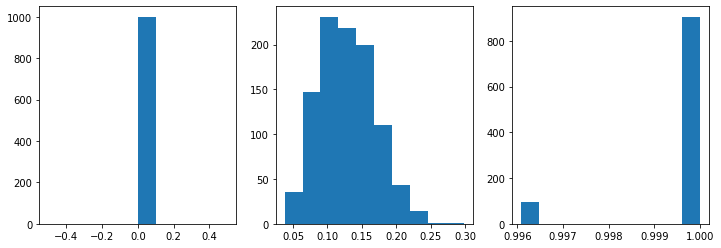

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(12,4)) 

axs[0].hist( mnist_min )
axs[1].hist( mnist_means )
axs[2].hist( mnist_max )

In [11]:
mnist_complete = [ graph_data_list_mnist[i].x.numpy() for i in range(len(graph_data_list_mnist)) ]

mnist_complete = np.array(mnist_complete)
print(mnist_complete.shape)
mnist_complete = mnist_complete.reshape(-1)  

(1000, 784, 1)


In [12]:
print('mnist_complete.shape: ', mnist_complete.shape)
print('np.percentile(mnist_complete, q=[1,10,25,50,75,90,99]) : ', np.percentile(mnist_complete, q=[1,10,25,50,75,90,99]))
print('\n')

print('mnist_complete.min() : ', mnist_complete.min())
print('mnist_complete.max() : ', mnist_complete.max())
print('mnist_complete.mean() : ', mnist_complete.mean())

mnist_complete.shape:  (784000,)
np.percentile(mnist_complete, q=[1,10,25,50,75,90,99]) :  [0.         0.         0.         0.         0.         0.78039217
 0.99607843]


mnist_complete.min() :  0.0
mnist_complete.max() :  1.0
mnist_complete.mean() :  0.12823895


(array([649231.,   9619.,   8663.,   7435.,   7570.,   8032.,   7768.,
          8709.,  10145.,  66828.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

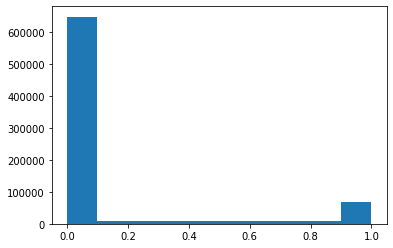

In [13]:
plt.hist( mnist_complete )

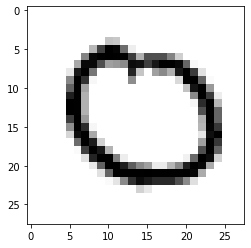

In [14]:
# Plot a random number 
random_sample = 108
plt.imshow( np.reshape( graph_data_list_mnist[random_sample].x.numpy() , (28, 28)), cmap = 'gray_r' )

# Understanding air pollution dataset

In [15]:
location = '../../Datasets/air_pollution_data/2d_canyon_' 
start_index = 0
end_index = 401

vtu_file_locations = [ location + str(i) + '.vtu' for i in range(start_index, end_index)]
features_list = ['TracerBackground']  # ['TracerBackground','Velocity']

In [16]:
big_numpy_air = []

#Create an empty graph data list
graph_data_list = []
    
for file_location in vtu_file_locations:
    
    vtu_object = vtktools.vtu(file_location)

    ## x
    node_features = get_node_features(vtu_object, features_list)
    big_numpy_air.append(node_features.numpy()) 

In [17]:
big_numpy_air_min = [big_numpy_air[i].min() for i in range(end_index-start_index)]
big_numpy_air_mean = [big_numpy_air[i].mean() for i in range(end_index-start_index)]
big_numpy_air_max = [big_numpy_air[i].max() for i in range(end_index-start_index)]

(array([ 22.,  20.,  16.,  23.,  21.,  30.,  21.,  29.,  53., 166.]),
 array([0.96272253, 0.96645028, 0.97017803, 0.97390577, 0.97763352,
        0.98136127, 0.98508901, 0.98881676, 0.99254451, 0.99627225,
        1.        ]),
 <BarContainer object of 10 artists>)

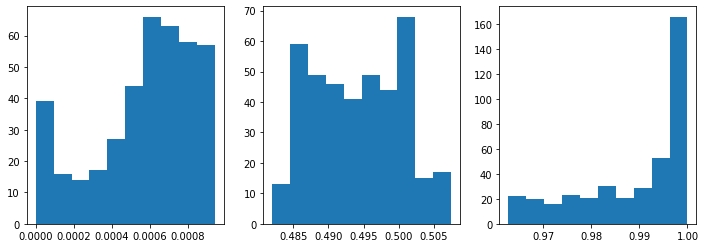

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(12,4)) 

axs[0].hist( big_numpy_air_min )
axs[1].hist( big_numpy_air_mean )
axs[2].hist( big_numpy_air_max )

In [19]:
big_numpy_air = np.array(big_numpy_air)
big_numpy_air = big_numpy_air.reshape(-1)  #401*852*1,1

In [20]:
print('big_numpy_air.shape: ', big_numpy_air.shape)
print('np.percentile(big_numpy_air, q=[1,10,25,50,75,90,99]) : ', np.percentile(big_numpy_air, q=[1,10,25,50,75,90,99]))
print('\n')

print('big_numpy_air.min() : ', big_numpy_air.min())
print('big_numpy_air.max() : ', big_numpy_air.max())
print('big_numpy_air.mean() : ', big_numpy_air.mean())

big_numpy_air.shape:  (341652,)
np.percentile(big_numpy_air, q=[1,10,25,50,75,90,99]) :  [0.02277537 0.262481   0.41309151 0.49813953 0.57217985 0.73737229
 0.96614349]


big_numpy_air.min() :  0.0
big_numpy_air.max() :  1.0
big_numpy_air.mean() :  0.49424823998763695


(array([15896., 10130., 14366., 37022., 96661., 97341., 29180., 16894.,
        13945., 10217.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

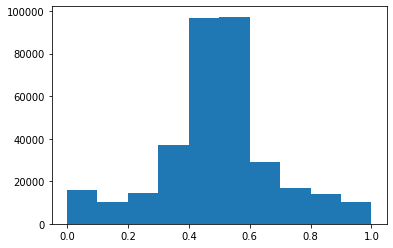

In [21]:
plt.hist( big_numpy_air )

# Understanding WaveSuite dataset

In [22]:
location = '../../Datasets/WaveSuite_VTK/sateNo4_1_' 
start_index = 40
end_index = 100

vtu_file_locations = [ location + str(i) + '.vtu' for i in range(start_index, end_index)]
features_list = ['nut']  # ['TracerBackground','Velocity']

In [23]:
big_numpy_wave = []

#Create an empty graph data list
graph_data_list = []
    
for file_location in vtu_file_locations:
    
    vtu_object = vtktools.vtu(file_location)

    ## x
    node_features = get_node_features(vtu_object, features_list)
    big_numpy_wave.append(node_features.numpy()) 

In [24]:
big_numpy_wave_min  = [big_numpy_wave[i].min() for i in range(end_index-start_index)]
big_numpy_wave_mean = [big_numpy_wave[i].mean() for i in range(end_index-start_index)]
big_numpy_wave_max  = [big_numpy_wave[i].max() for i in range(end_index-start_index)]

(array([10., 10., 13., 10.,  9.,  7.,  0.,  0.,  0.,  1.]),
 array([0.667072  , 1.32004678, 1.97302155, 2.62599633, 3.27897111,
        3.93194589, 4.58492067, 5.23789545, 5.89087023, 6.543845  ,
        7.19681978]),
 <BarContainer object of 10 artists>)

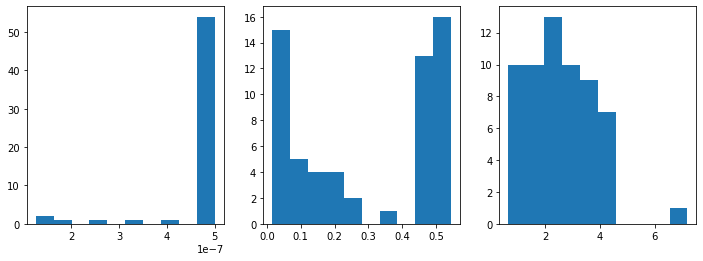

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(12,4)) 

axs[0].hist( big_numpy_wave_min )
axs[1].hist( big_numpy_wave_mean )
axs[2].hist( big_numpy_wave_max )

In [26]:
big_numpy_wave = np.array(big_numpy_wave)
big_numpy_wave = big_numpy_wave.reshape(-1)  

In [27]:
print('big_numpy_wave.shape: ', big_numpy_wave.shape)
print('np.percentile(big_numpy_wave, q=[1,10,25,50,75,90,99]) : ', np.percentile(big_numpy_wave, q=[1,10,25,50,75,90,99]))
print('\n')

print('big_numpy_wave.min() : ', big_numpy_wave.min())
print('big_numpy_wave.max() : ', big_numpy_wave.max())
print('big_numpy_wave.mean() : ', big_numpy_wave.mean())

big_numpy_wave.shape:  (51066060,)
np.percentile(big_numpy_wave, q=[1,10,25,50,75,90,99]) :  [4.99999999e-07 6.99769007e-05 9.83634018e-05 3.73364007e-03
 4.29327995e-01 9.49258029e-01 2.24745989e+00]


big_numpy_wave.min() :  1.2637700308459898e-07
big_numpy_wave.max() :  7.19681978225708
big_numpy_wave.mean() :  0.2934306075431288


(array([4.3636366e+07, 5.0242800e+06, 1.7917430e+06, 4.8609000e+05,
        1.1357600e+05, 1.3961000e+04, 2.6000000e+01, 1.3000000e+01,
        3.0000000e+00, 2.0000000e+00]),
 array([1.26377003e-07, 7.19682092e-01, 1.43936406e+00, 2.15904602e+00,
        2.87872799e+00, 3.59840995e+00, 4.31809192e+00, 5.03777389e+00,
        5.75745585e+00, 6.47713782e+00, 7.19681978e+00]),
 <BarContainer object of 10 artists>)

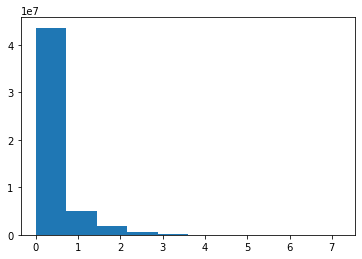

In [28]:
plt.hist( big_numpy_wave )

# Plot and save the distributions of all the datasets

Since the WaveSuite dataset is the only one which values are not standardized between 0 and 1, I will divide the values by 7.2 in order to standardize them. 

After dividing the values by 7.2 it is possible to see that the WaveSuite distribution is similar to the MNIST distribution. 

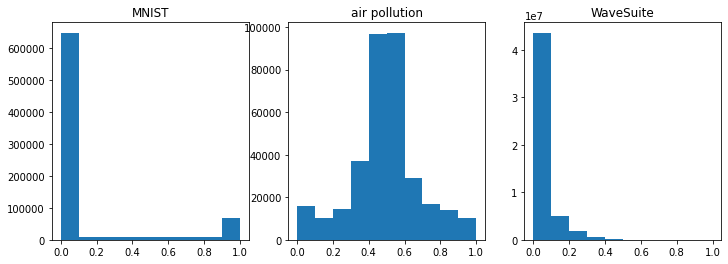

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(12,4)) 

axs[0].hist( mnist_complete )
axs[1].hist( big_numpy_air )
axs[2].hist( big_numpy_wave/7.2 )

axs[0].title.set_text('MNIST')
axs[1].title.set_text('air pollution')
axs[2].title.set_text('WaveSuite')

plt.savefig('Datasets distribution')